# K-Nearest-Neighbors

## Contents


* Introduction
* Algorithm
* Application on dataset

   * Data Visualization
   
   * Modeling and Test Model
   
   * Classification report
* Error Analysis
* Use different K 

## Introduction

The k-nearest neighbors algorithm (k-NN) is a non-parametric supervised learning method. It is used for classification and regression. In both cases, the input consists of the k closest training examples in a data set. The output depends on whether k-NN is used for classification or regression:

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors. If k = 1, then the output is simply assigned to the value of that single nearest neighbor.
k-NN is a type of classification where the function is only approximated locally and all computation is deferred until function evaluation. Since this algorithm relies on distance for classification, if the features represent different physical units or come in vastly different scales then normalizing the training data can improve its accuracy dramatically.

Both for classification and regression, a useful technique can be to assign weights to the contributions of the neighbors, so that the nearer neighbors contribute more to the average than the more distant ones. For example, a common weighting scheme consists in giving each neighbor a weight of 1/d, where d is the distance to the neighbor.

The neighbors are taken from a set of objects for which the class (for k-NN classification) or the object property value (for k-NN regression) is known. This can be thought of as the training set for the algorithm, though no explicit training step is required.

A peculiarity of the k-NN algorithm is that it is sensitive to the local structure of the data.

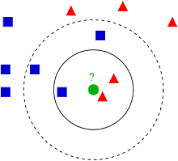

## Algorithm

The K-NN working can be explained on the basis of the below algorithm:

Step-1: Select the number K of the neighbors

Step-2: Calculate the Euclidean distance of K number of neighbors

Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.

Step-4: Among these k neighbors, count the number of the data points in each category.

Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.

Step-6: Our model is ready.

## Application on dataset

In [18]:
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns


%matplotlib inline 

## Models
from sklearn.neighbors import KNeighborsClassifier


## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Prepare Data

In [19]:
df = pd.read_csv("/Users/liusiling/Desktop/semester2/577/diabetes.csv") 
df.shape

(768, 9)

## Visualization

In [20]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


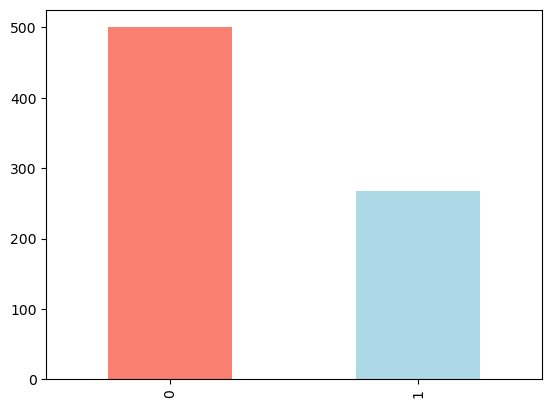

In [21]:
# Plot the value counts with a bar graph
df.Outcome.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can inspect each feature against the outcome to identify any important correlations between the features.

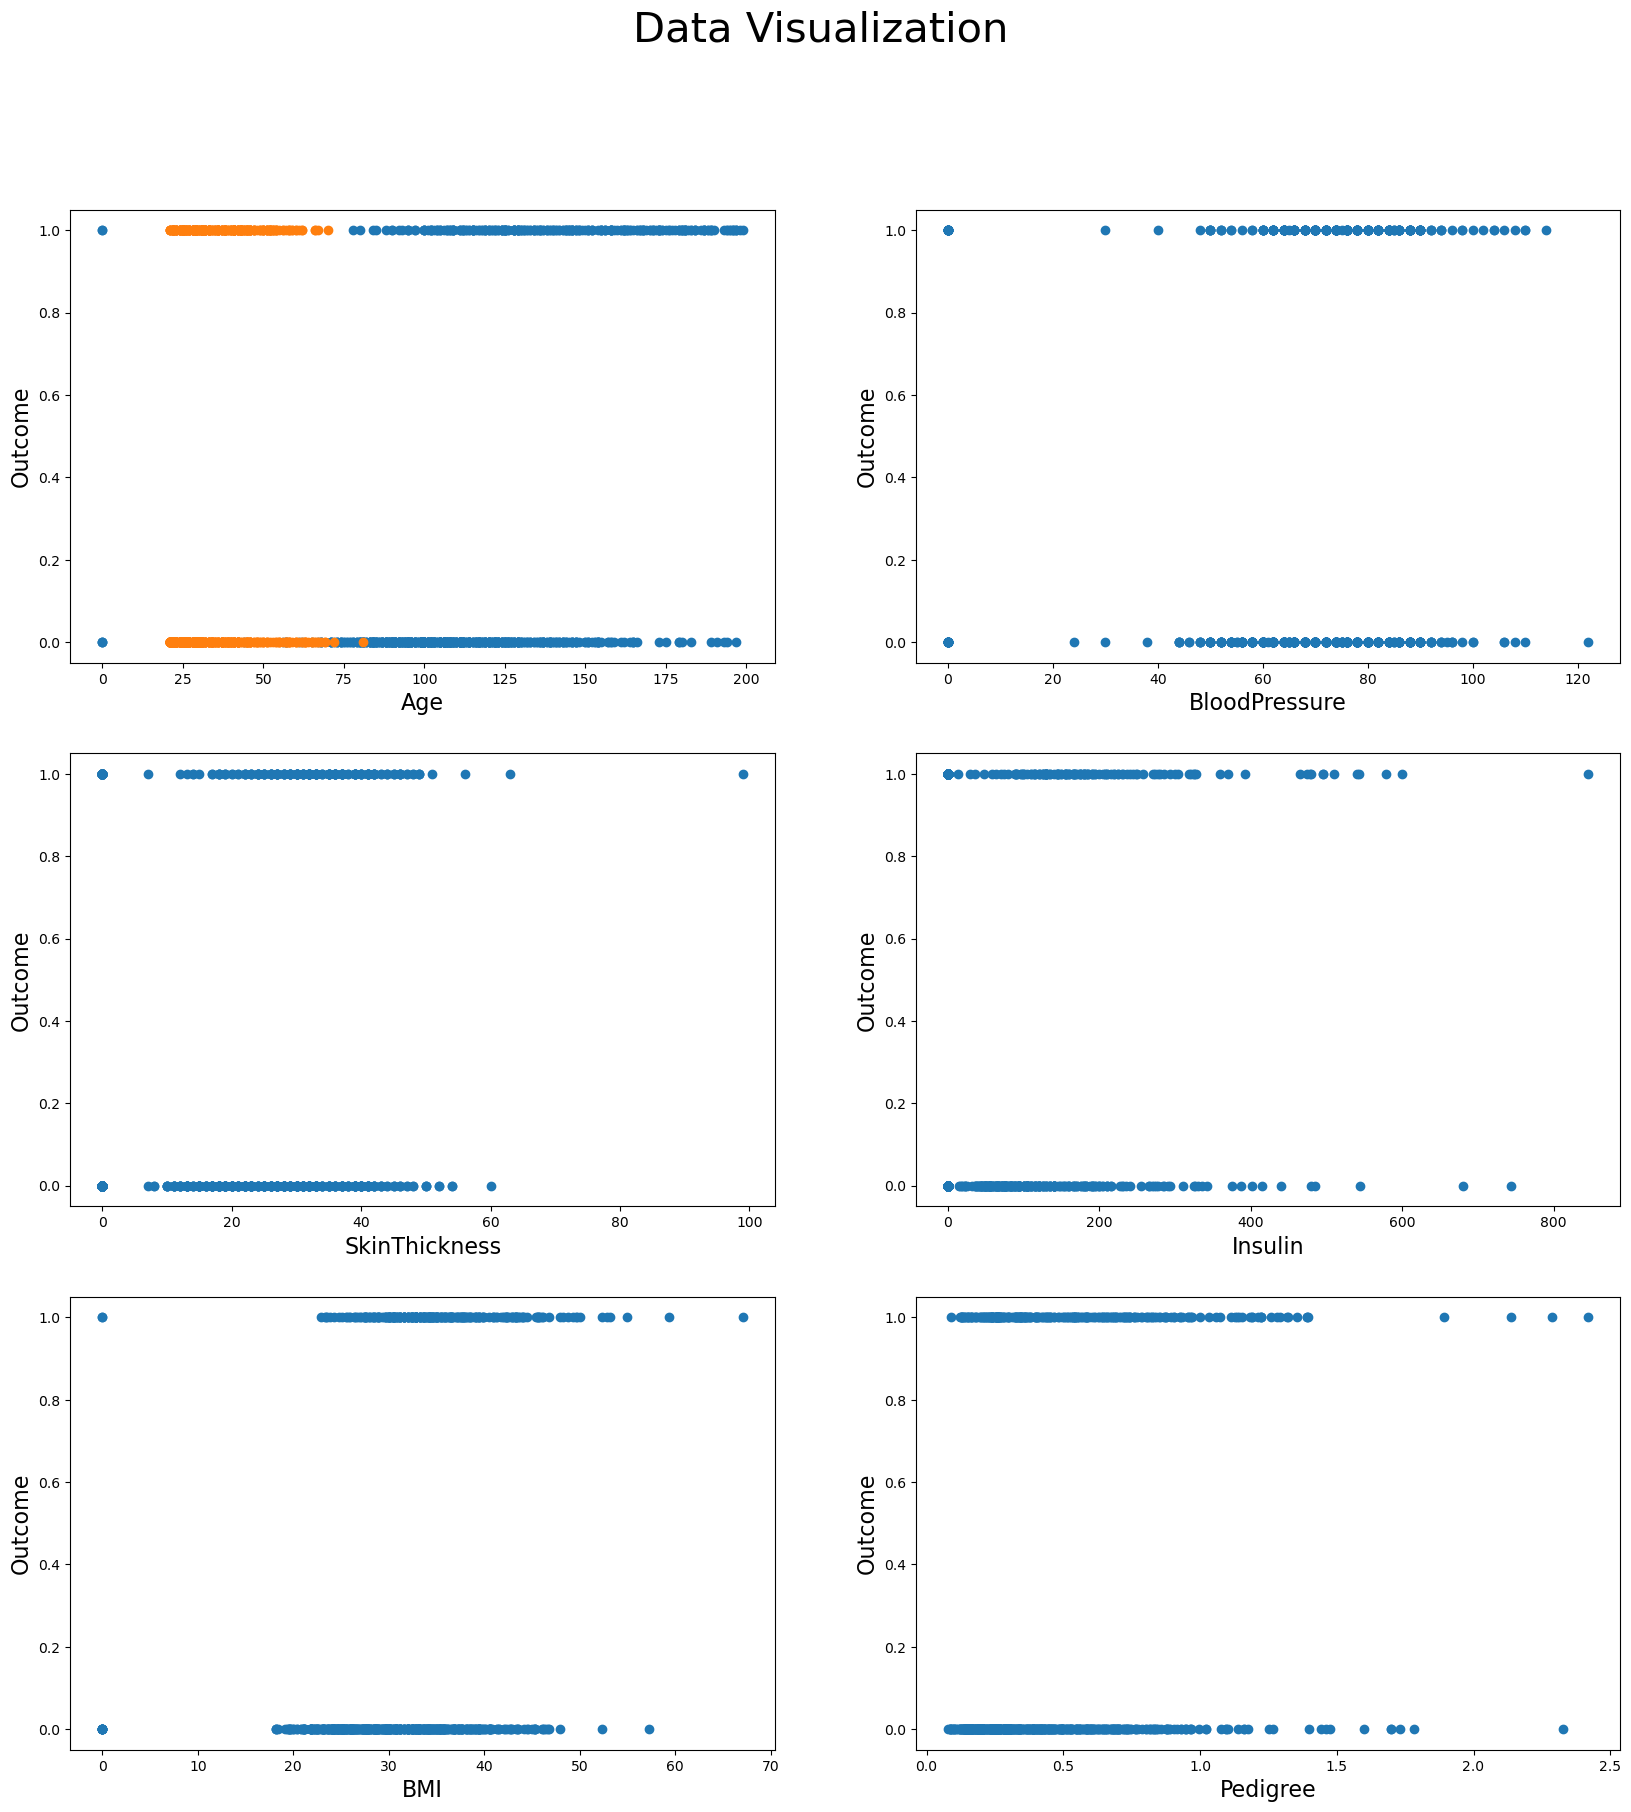

In [23]:
fig, axs = plt.subplots(3,2)

fig.set_size_inches(20, 20)


fig.suptitle("Data Visualization", fontsize = 30)
label = df.columns[-1]
i = 0
j = 0
# Plot each feature against the outcome
for feature in df.columns[1:-1]:
    axs[i,j].scatter(df[feature], df[label])
    axs[i,j].set_xlabel(feature, fontsize = 16)
    axs[i,j].set_ylabel(label, fontsize = 16)
    j += 1
    if j > 1:
        j = 0
        i += 1
    if i > 2:
        i = 0



## Modeling

In [28]:
X = df.drop("Outcome", axis=1)

y = df["Outcome"]

In [29]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2) 

In [30]:
model = KNeighborsClassifier(n_neighbors =2)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

## Test the Model

In [31]:
model.score(X_test, y_test)

/Users/liusiling/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7012987012987013

/Users/liusiling/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Model F1 Score: 0.47
              precision    recall  f1-score   support

           0       0.72      0.89      0.79        99
           1       0.65      0.36      0.47        55

    accuracy                           0.70       154
   macro avg       0.68      0.63      0.63       154
weighted avg       0.69      0.70      0.68       154



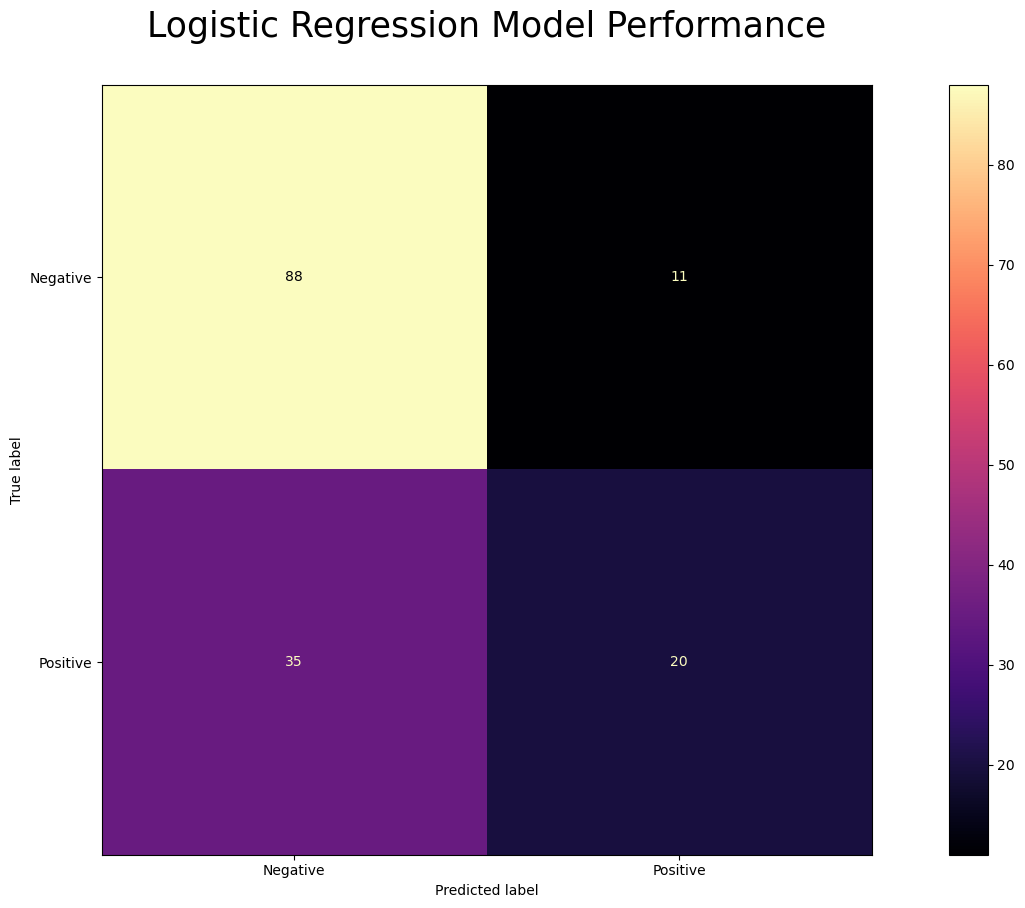

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

y_hat = model.predict(X_test)

print(f"Model F1 Score: {np.round(f1_score(y_test, y_hat),2)}")

labels = ['test1', 'test2']
displabels = ['Negative', 'Positive']

fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.set_title('Logistic Regression Model Performance\n', fontsize = 25)
ConfusionMatrixDisplay.from_predictions(y_test, y_hat, display_labels = displabels, cmap = 'magma', colorbar=True, ax=ax)

print(classification_report(y_test, y_hat))

## Classification report

In [33]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.72      0.89      0.79        99
           1       0.65      0.36      0.47        55

    accuracy                           0.70       154
   macro avg       0.68      0.63      0.63       154
weighted avg       0.69      0.70      0.68       154



## Error Analysis

In [34]:
# MSE
MSE = (1/X_test.shape[0])*sum((y_hat - y_test)**2)
print(f"Mean Squared Error: {np.round(MSE,2)}")

# SSE
SSE = sum((y_hat - y_test)**2)
print(f"Sum Squared Error: {np.round(SSE,2)}")

# SST
SST = sum((y_test - np.mean(y_test))**2)
print(f"Sum Squared Total: {np.round(SST,2)}")

# R_2
R_2 = 1-SSE/SST
print(f"R^2: {np.round(R_2,2)}")

Mean Squared Error: 0.3
Sum Squared Error: 46
Sum Squared Total: 35.36
R^2: -0.3


## Use different K value to predict

In [41]:
score_k =[]
for k in range (2, 15):
    knn_k =KNeighborsClassifier (n_jobs=-1, n_neighbors =k)
    knn_k.fit (X_train, y_train)
    y_pred_k = knn_k.predict (X_test)
    score = knn_k.score(X_test, y_test)
    score_k.append (score.mean ())

/Users/liusiling/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/liusiling/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

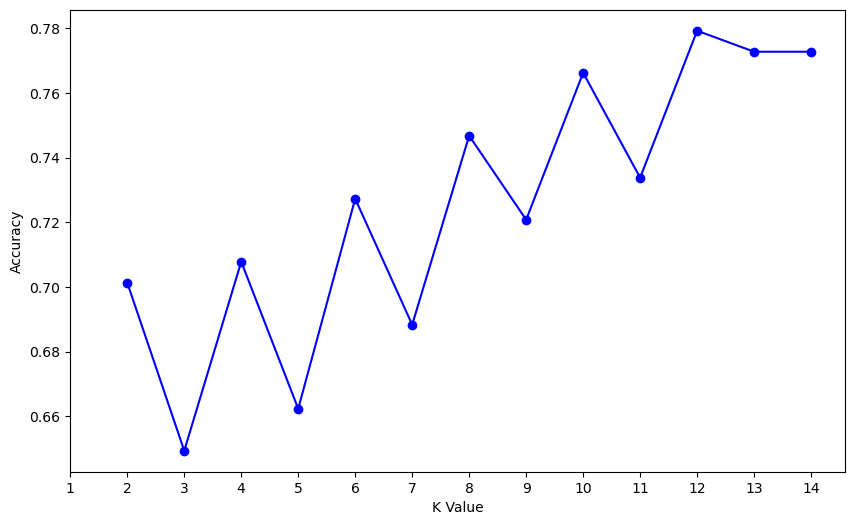

In [42]:
#Ploting predict accuracy with different K value 
plt.figure(figsize=(10,6))
plt.plot(range(2,15), score_k,marker='o',color = 'blue')
plt.xlabel ('K Value')
plt.ylabel ('Accuracy')
plt.xticks (range (1,15,1))
plt.show()

We can see that when K is even, the testing accuracy is higher. 

The basic idea of the KNN algorithm is to find the nearest K training samples to the samples to be classified by calculating the distance between the samples, and use their categories as the categories of the samples to be classified. When K is an odd number, the classification result is easy to be divided into a certain category, because it can avoid the situation that the classification result is a tie. However, in some cases it may be more accurate for K to be even.

One possible explanation is that when K is even, more training data is considered, which better describes the overall characteristics of the dataset. In addition, when there are noises or outliers in the dataset, choosing an even K value may better balance the weights of the training data and thus classify the test data more accurately.